# Sissejuhatus <a name="intro"></a>

Teise praktikumi jooksul tutvume täiendavate kaardielementidega:
-  punkttähised, tekst ja legend;
-  kahe aknaga joonised;
-  ortodroom ja loksodroom;
-  almukantaraat;
-  moondeellips.

2. [Kaardielemendid](#algus)<br>
    2.1 [Punkttähised, tekst ja legend](#ptl)<br>
    2.2 [Kahe aknaga joonis](#aknad)<br>
    2.3 [Ortodroom ja loksodroom](#orto)<br>
    2.4 [Almukantaraat](#almukantaraat)<br>
    2.5 [Moondeellips](#ellips)<br>
    2.6 [Ülesanne](#ül2)

# 2 Kaardielemendid <a name="algus"></a>

## 2.1 Punkttähised, tekst ja legend <a name="ptl"></a>

Järgnevalt uurime, kuidas lisada joonisele mõned täiendavad elemendid nagu punkttähised, nende juurde kuuluv tekst ja kaardi legend. Kaardi põhja moodustame mooduli [feature](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html) kihtidest (käsk <code>NaturalEarthFeature()</code>). Seejärel lisame käsu <code>plot()</code> abil Baltimaade pealinnade punkttähised. Käsu esimene ja teine parameeter on vastavalt linnade pikkus- ja laiuskraadide nimekiri. Linnade koordinaadid peab eelnevalt teisendama kaardiakna projektsiooni (käsk <code>transform_point()</code>). Kui lisada korraga mitu punkti, siis vaikimisi üritab Cartopy need ühendada joontega. Joonte vältimiseks tuleks need peita (<code>linestyle='None'</code>).

Linnade nimed lisame käsuga <code>text()</code> ja halo käsuga <code>set_path_effects()</code>. Pealkirja jaoks saab kasutada käsku [set_title()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_title.html). Käsk [legend()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html) lisab legendi ja juhul, kui punktide puhul on varem täpsustatud parameeter <code>label</code>, siis lisatakse vastava elemendi kirje legendi automaatselt.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects # vajalik teksti ümber halo lisamiseks
import cartopy.crs as ccrs
import cartopy.feature as cfeature

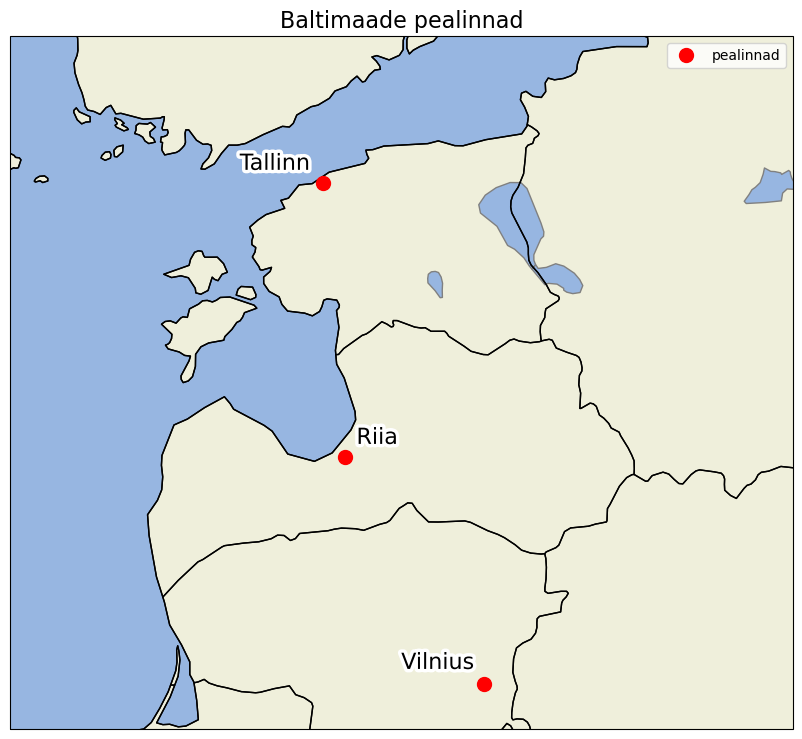

In [2]:
plt.figure(figsize=(12, 9))
proj = ccrs.AlbersEqualArea()
ax = plt.axes(projection=proj)

# Kaardikihid
resolution = '50m'
ax.add_feature(
    cfeature.NaturalEarthFeature('physical', 'ocean', resolution, facecolor=cfeature.COLORS['water'])
)
ax.add_feature(
    cfeature.NaturalEarthFeature('physical', 'land', resolution, edgecolor='black', facecolor=cfeature.COLORS['land'])
)
ax.add_feature(
    cfeature.NaturalEarthFeature('physical', 'lakes', resolution, edgecolor='gray', facecolor=cfeature.COLORS['water'])
)
ax.add_feature(
    cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', resolution, edgecolor='black', facecolor='none')
)

# Linnade koordinaadid
tln_lon, tln_lat = 24.745278, 59.437222 # Tallinn
rig_lon, rig_lat = 24.106389, 56.948889 # Riia
vln_lon, vln_lat = 25.283333, 54.683333 # Vilnius

# Koordinaatide transformeerimine
tln_lon_tp, tln_lat_tp = proj.transform_point(tln_lon, tln_lat, ccrs.Geodetic())
rig_lon_tp, rig_lat_tp = proj.transform_point(rig_lon, rig_lat, ccrs.Geodetic())
vln_lon_tp, vln_lat_tp = proj.transform_point(vln_lon, vln_lat, ccrs.Geodetic())

# Punktid linnade tähistamiseks
ax.plot(
    [tln_lon_tp, rig_lon_tp, vln_lon_tp], [tln_lat_tp, rig_lat_tp, vln_lat_tp], 
    color='red', marker='o', markersize=10, linestyle='None', label='pealinnad', transform=proj
)

# Linnade nimed
txt1 = ax.text(tln_lon-1.2, tln_lat+0.3, 'Tallinn', fontsize=16, horizontalalignment='left', transform=ccrs.Geodetic())
txt1.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')]) # halo teksti ümber
txt2 = ax.text(rig_lon+0.8, rig_lat, 'Riia', fontsize=16, horizontalalignment='right', transform=ccrs.Geodetic())
txt2.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt3 = ax.text(vln_lon-1.1, vln_lat+0.3, 'Vilnius', fontsize=16, horizontalalignment='left', transform=ccrs.Geodetic())
txt3.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

# Joonise pealkiri
ax.set_title('Baltimaade pealinnad', fontsize=16)

# Ulatus
extent = (20, 30, 55, 60)
ax.set_extent(extent)

# Legend
plt.legend()

<div style="text-align:right">
    <a href="#intro">algusesse</a>
</div>

##  2.2 Kahe aknaga joonis <a name="aknad"></a>

Cartopy võimaldab luua ka kahe (või mitme) aknaga jooniseid. Selleks tuleks lihtsalt samale joonisele konstrueerida kaks teljestikku, millele saab seejärel määrata erinevad projektsioonid. Teljestikud saab üles ehitada teegi Matplotlib käsu [subplot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) kaudu. Igasugused täiendavad elemendid (tekst, pealkirjad, kaardikihid jne) on võimalik lisada eraldi iga teljestiku jaoks.

Text(0.5, 1.0, 'Mollweide projektsioon')

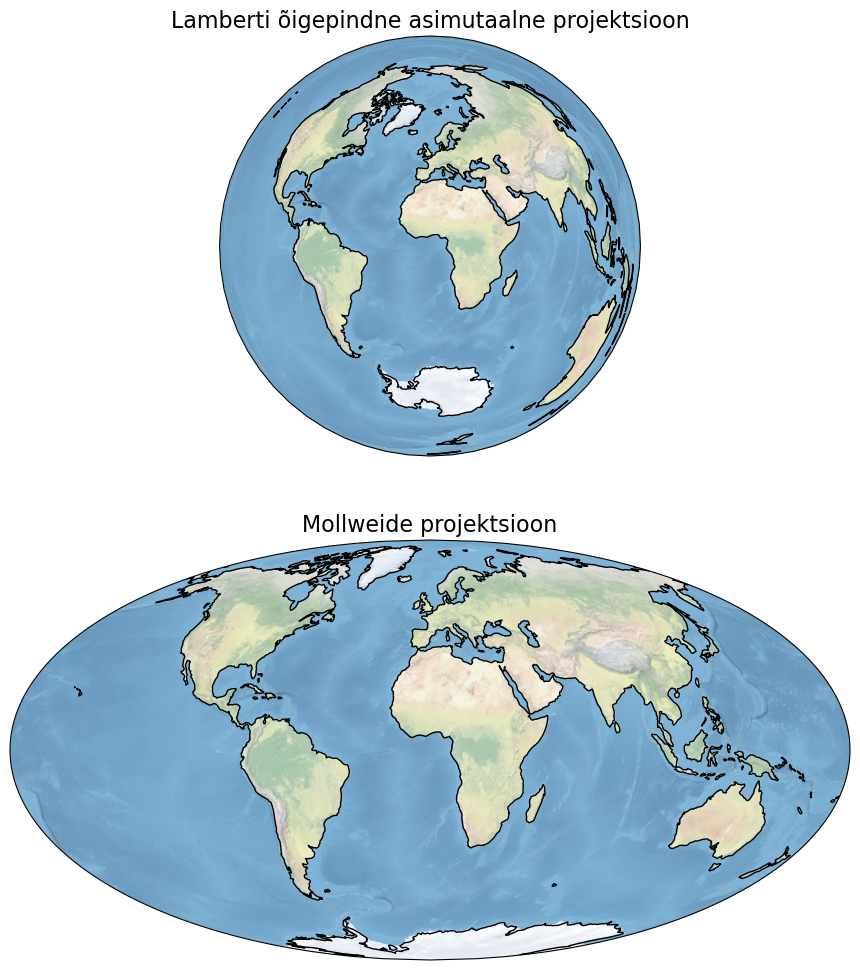

In [3]:
# Projektsioonide objektid
proj1 = ccrs.LambertAzimuthalEqualArea()
proj2 = ccrs.Mollweide()

plt.figure(figsize=(16, 12))

# Esimene teljestik
ax1 = plt.subplot(2, 1, 1, projection=proj1)
ax1.stock_img() # madala resolutsiooniga füüsiline maailmakaart
ax1.coastlines()
ax1.set_title('Lamberti õigepindne asimutaalne projektsioon', fontsize=16)

# Teine teljestik
ax2 = plt.subplot(2, 1, 2, projection=proj2)
ax2.stock_img()
ax2.coastlines()
ax2.set_title('Mollweide projektsioon', fontsize=16)

<div style="text-align:right">
    <a href="#intro">algusesse</a>
</div>

## 2.3 Ortodroom ja loksodroom <a name="orto"></a>

Järgnevalt uurime [ortodroomi](https://en.wikipedia.org/wiki/Great-circle_distance) (ka lühim teekond või geodeetiline joon) ja [loksodroomi](https://en.wikipedia.org/wiki/Rhumb_line) ehk samaasimuudijoone konstrueerimist. Võtame selleks kaks linna (nt Los Angeles ja Madrid) ja vaatleme, kuidas erinevad oma trajektoori poolest vastavalt nendevahelised ortodroom, loksodroom ja sirgjoon. Kõik jooned saab lisada standardse käsuga <code>plot()</code>, kuid sõltuvalt joonest tuleks parameetri <code>transform()</code> projektsiooni väärtuseks määrata 
-  ortodroomi puhul <code>Geodetic()</code>;
-  loksodroomi korral <code>PlateCarree()</code>;
-  sirgjoone puhul see projektsioon, mida on eelnevalt kasutatud kaardiakna loomise käigus.

Lisaks peab sirgjoone jaoks ka punktide koordinaadid teisendama kaardiakna projektsiooni (käsk <code>transform_point()</code>).

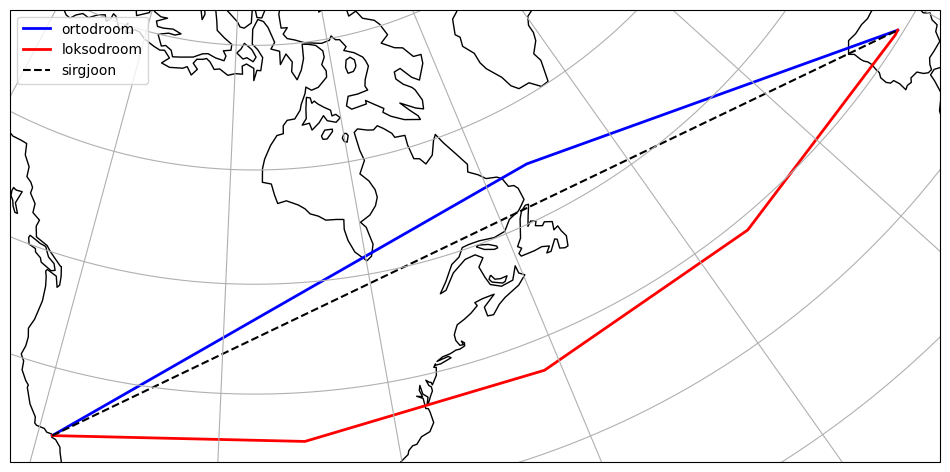

In [4]:
# Linnade koordinaadid
la_lon, la_lat = -118.4, 33.9 # Los Angeles
mad_lon, mad_lat = -3.6, 40.5 # Madrid

plt.figure(figsize=(12, 9))
proj = ccrs.LambertConformal()
ax = plt.axes(projection=proj)
ax.coastlines()
ax.gridlines()

# Ortodroom
ax.plot(
    [la_lon, mad_lon], [la_lat, mad_lat], color='blue', linewidth=2, label='ortodroom', transform=ccrs.Geodetic()
)

# Loksodroom
ax.plot(
    [la_lon, mad_lon], [la_lat, mad_lat], color='red', linewidth=2, label='loksodroom', transform=ccrs.PlateCarree()
)

# Koordinaatide transformeerimine
la_lon_tp1, la_lat_tp1 = proj.transform_point(la_lon, la_lat, ccrs.Geodetic())
mad_lon_tp1, mad_lat_tp1 = proj.transform_point(mad_lon, mad_lat, ccrs.Geodetic())
# Sirgjoon kahe linna vahel
ax.plot(
    [la_lon_tp1, mad_lon_tp1], [la_lat_tp1, mad_lat_tp1], color='black', linestyle='--', label='sirgjoon', transform=proj
)

plt.legend()

On näha, et sõltuvalt joonte konstrueerimise põhimõtetest erinevad joonte trajektoorid üsna palju. Joonte erinevused sõltuvad aga ka projektsioonist. Näiteks kattub Mercatori kui silindrilise õigenurkse projektsiooni korral loksodroom sirgjoonega ehk nende trajektoor on sama.

Optimeerimise huvides kasutab Cartopy antud joonte kuvamisel väga madalat resolutsiooni, mis tuli hästi esile just eelmise joonise puhul. Parema resolutsiooni saamiseks tuleb üle kirjutada vastava projektsiooni resolutsiooni parameetri väärtus. Selleks tuleks luua algse projektsiooni põhjal uus Pythoni klass, kus antud parameeter on vastavalt vajadusele muudetud.

In [5]:
# Parema resolutsiooniga LambertAzimuthalEqualArea
class HDLambertAzimuthal(ccrs.LambertAzimuthalEqualArea):

    @property
    def threshold(self):
        return super().threshold/100 # 100 korda kõrgem

# Parema resolutsiooniga Mollweide
class HDMollweide(ccrs.Mollweide):

    @property
    def threshold(self):
        return super().threshold/100

Võrdleme nüüd nende joonte trajektooride erinevust kahe erineva projektsiooni näitel. Eelnevalt defineeritud parema resolutsiooniga projektsioonide klasside kasutamiseks tuleks neid rakendada kaardiakende telgede loomise juures. Antud juhul kasutame klassi <code>HDLambertAzimuthal()</code> ülemise ja klassi <code>HDMollweide()</code> alumise akna telgede jaoks. Kõik jooned tuleks akende puhul defineerida eraldi ja tasub märkida, et kuigi akna projektsioon on määratud uue klassi abil, siis sirgjoone koordinaatide teisendamise peab siiski kasutama algset projektsiooni.

In [6]:
# Projektsioonide objektid
proj1 = ccrs.LambertAzimuthalEqualArea()
proj2 = ccrs.Mollweide()

# Ulatus
extent = (-120, 20, 0, 60)

plt.figure(figsize=(16, 12))

# Esimene teljestik

# Määrame joonise projektsiooniks eelnevalt loodud parema resolutsiooniga klassi
ax1 = plt.subplot(2, 1, 1, projection=HDLambertAzimuthal())
ax1.coastlines()
ax1.gridlines()
# Ortodroom
ax1.plot(
    [la_lon, mad_lon], [la_lat, mad_lat], color='blue', linewidth=2, transform=ccrs.Geodetic()
)
# Loksodroom
ax1.plot(
    [la_lon, mad_lon], [la_lat, mad_lat], color='red', linewidth=2, transform=ccrs.PlateCarree()
)
# Koordinaatide transformeerimine
la_lon_tp1, la_lat_tp1 = proj1.transform_point(la_lon, la_lat, ccrs.Geodetic())
mad_lon_tp1, mad_lat_tp1 = proj1.transform_point(mad_lon, mad_lat, ccrs.Geodetic())
# Sirgjoon kahe linna vahel
ax1.plot(
    [la_lon_tp1, mad_lon_tp1], [la_lat_tp1, mad_lat_tp1], color='black', linestyle='--', transform=proj1
)
# Punktid linnade tähistamiseks
ax1.plot(
    [la_lon_tp1, mad_lon_tp1], [la_lat_tp1, mad_lat_tp1], 
    color='black', marker='*', markersize=10, linestyle='None', transform=proj1
)
# Linnade nimed
txt1 = ax1.text(la_lon-1, la_lat+1, 'LA', fontsize=12, horizontalalignment='right', transform=ccrs.Geodetic())
txt1.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')]) # halo teksti ümber
txt2 = ax1.text(mad_lon+1, mad_lat+1, 'Madrid', fontsize=12, horizontalalignment='left', transform=ccrs.Geodetic())
txt2.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
# Joonise pealkiri
ax1.set_title('Lamberti õigepindne asimutaalne projektsioon', fontsize=16)
ax1.set_extent(extent)

# Teine teljestik

# Määrame joonise projektsiooniks eelnevalt loodud parema resolutsiooniga klassi
ax2 = plt.subplot(2, 1, 2, projection=HDMollweide())
ax2.coastlines()
ax2.gridlines()
# Ortodroom
ax2.plot(
    [la_lon, mad_lon], [la_lat, mad_lat], color='blue', linewidth=2, transform=ccrs.Geodetic()
)
# Loksodroom
ax2.plot(
    [la_lon, mad_lon], [la_lat, mad_lat], color='red', linewidth=2, transform=ccrs.PlateCarree()
)
# Koordinaatide transformeerimine
la_lon_tp2, la_lat_tp2 = proj2.transform_point(la_lon, la_lat, ccrs.Geodetic())
mad_lon_tp2, mad_lat_tp2 = proj2.transform_point(mad_lon, mad_lat, ccrs.Geodetic())
# Sirgjoon kahe linna vahel
ax2.plot(
    [la_lon_tp2, mad_lon_tp2], [la_lat_tp2, mad_lat_tp2], color='black', linestyle='--', transform=proj2
)
# Punktid linnade tähistamiseks
ax2.plot(
    [la_lon_tp2, mad_lon_tp2], [la_lat_tp2, mad_lat_tp2], 
    color='black', marker='*', markersize=10, linestyle='None', transform=proj2
)
# Linnade nimed
txt1 = ax2.text(la_lon-1, la_lat+1, 'LA', fontsize=12, horizontalalignment='right', transform=ccrs.Geodetic())
txt1.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')]) # halo teksti ümber
txt2 = ax2.text(mad_lon+1, mad_lat+1, 'Madrid', fontsize=12, horizontalalignment='left', transform=ccrs.Geodetic())
txt2.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
# Joonise pealkiri
ax2.set_title('Mollweide projektsioon', fontsize=16)
ax2.set_extent(extent)

AttributeError: can't set attribute 'threshold'

<Figure size 1600x1200 with 0 Axes>

<div style="text-align:right">
    <a href="#intro">algusesse</a>
</div>

## 2.4 Almukantaraat <a name="almukantaraat"></a>

[Almukantaraat](https://en.wikipedia.org/wiki/Almucantar) ehk samakaugusjoon on horisondiga paralleelne, kujuteldav ringjoon taevakeha või Maa pinnal. Cartopy teegis puudub almukantaraadi konstrueerimiseks vastav funktsioon. Küll aga on võimalik kaardile lisada mingit punkti ümbritsev ja teatud projektsioonis ringjoon. Seega saab ise luua almukantaraadi jaoks funktsiooni, mis arvutab keskpunkti koordinaatide, projektsiooni andmete ja raadiuse põhjal vastava raadiuse suuruse õiges projektsioonis.

In [ ]:
def get_radius(lon, lat, proj, radius):
    # Kui laius on lõunalaius, siis tuleb raadius liita ja vastupidi
    if lat <= 0:
        phi = lat+radius
    else:
        phi = lat-radius
    # Koordinaatide transformeerimine ja uue laiuse tagastamine
    lon_tp, lat_tp = proj.transform_point(lon, phi, ccrs.PlateCarree())
    return abs(lat_tp)

Seejärel rakendame loodud funktsiooni samakaugusjoone lisamiseks. Antud juhul loome 45-kraadise raadiusega ringjoone ümber Tartu ja sama funktsiooni abil ka natuke suurema läbimõõduga nn puhvri, mis määrab meie kaardi ulatuse. Almukantaraadi kujutamiseks kasutatakse sageli mõnda poolkerakaartide projektsiooni ja hästi sobib näiteks ortograafiline projektsioon. Soovitud keskpunkti ja raadiusega ringjoone lisamiseks saab kasutada mooduli [patches](https://matplotlib.org/api/_as_gen/matplotlib.patches.Patch.html) käsku <code>Circle()</code>. Parameeter <code>zorder</code> määrab elemendi kuvamise järjekorra ja piisavalt suur väärtus tagab selle, et antud ringjoon oleks teiste kihtide peal.

In [ ]:
import matplotlib.patches as mpatches # vajalik ringi lisamiseks

# Tartu koordinaadid
trt_lon, trt_lat = 26.716667, 58.383333
# Raadius
r = 45
# Projektsioon
proj = ccrs.Orthographic(central_longitude=trt_lon, central_latitude=trt_lat)

# Raadiuse ja puhvri arvutamine
r_ortho = get_radius(trt_lon, trt_lat, proj, r)
r_buff = get_radius(trt_lon, trt_lat, proj, r+5)

plt.figure(figsize=(12, 9))
ax = plt.axes(projection=proj)

# Kuna set_extent() mingil põhjusel antud projektsiooniga hästi ei tööta, siis tuleb ulatus määrata nii
ax.set_xlim([-r_buff, r_buff])
ax.set_ylim([-r_buff, r_buff])

resolution = '50m'
ax.add_feature(cfeature.OCEAN)
ax.add_feature(
    cfeature.NaturalEarthFeature('physical', 'land', resolution, edgecolor='black', facecolor=cfeature.COLORS['land'])
)
ax.add_feature(
    cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', resolution, edgecolor='black', facecolor='none')
)

# Ringi lisamine välja arvutatud raadiuse abil
ax.add_patch(
    mpatches.Circle(xy=[trt_lon, trt_lat], radius=r_ortho, alpha=0.3, transform=proj, zorder=30, facecolor='red')
)

<div style="text-align:right">
    <a href="#intro">algusesse</a>
</div>

## 2.5 Moondeellips <a name="ellips"></a>

Viimaseks elemendiks on [moondeellips](https://en.wikipedia.org/wiki/Tissot%27s_indicatrix) ehk Tissot’ indikatriss, mille saab lisada käsu [tissot()](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html?#cartopy.mpl.geoaxes.GeoAxes.tissot) abil. Kui käsu parameetrid jätta täpsustamata, siis kuvatakse moondeellipsid küll õiges projektsioonis, kuid nende asukoht ei kattu üldjuhul korralikult kaardivõrguga. Lisaks on ellipsid maailmakaardi jaoks ka ehk liiga väikse läbimõõduga.

In [ ]:
plt.figure(figsize=(12, 9))
proj = ccrs.Mollweide()
ax = plt.axes(projection=proj)
ax.stock_img()
ax.coastlines()

# Meridiaanid vahemikus [-180, -90, 0, 90, 180]
xlocs = [-180, -90, 0, 90, 180]

# Paralleelid vahemikus -90 kuni 90, 30-kraadise intervalliga
ylocs = []
i = -90
while i <= 90:
    ylocs.append(i)
    i += 30

# Lisame võrgu
gl = ax.gridlines(xlocs=xlocs, ylocs=ylocs, linewidth=2, color='gray', alpha=0.5)

# Moondeellipsid
ax.tissot(facecolor='orange', alpha=0.5)

Kui soovime ellipsid paigutada sinna, kus meridiaanid ja paralleelid lõikuvad, siis tuleb nende asukoht määrata kaardivõrgu loomiseks kasutatud väärtusi. Ellipsite suurust saab korrigeerida parameetri <code>rad_km</code> abil. Loomulikult saab muuta ka ellipsite välimust (värv, läbipaistvus jne).

In [ ]:
plt.figure(figsize=(12, 9))
proj = ccrs.Mollweide()
ax = plt.axes(projection=proj)
ax.stock_img()
ax.coastlines()

xlocs = [-180, -90, 0, 90, 180]

ylocs = []
i = -90
while i <= 90:
    ylocs.append(i)
    i += 30

gl = ax.gridlines(xlocs=xlocs, ylocs=ylocs, linewidth=2, color='gray', alpha=0.5)

# Moondeellipsid, mille raadius on 1000 km
ax.tissot(rad_km=1000, lons=xlocs, lats=ylocs, facecolor='orange', alpha=0.5)

<div style="text-align:right">
    <a href="#intro">algusesse</a>
</div>

## 2.6 Ülesanne <a name="ül2"></a>

Loo antud juhendile tuginedes kaks joonist.


Esimene võiks olla maailmakaart, mis täidab järgmised nõuded:
-  on antud juhendis veel käsitlemata projektsioonis;
-  sellele on lisatud omatehtud kaardivõrk;
-  kaardile on lisatud vähemalt kaks (nt rannajoon ja füüsiline kaart) täiendavat kihti;
-  joonisel on ka moondeellipsid.

In [ ]:
# Esimese joonise kood

Teisel joonisel on kaks kaardiakent ja see täidab järgmised nõuded:
-  aknad on erineva projektsiooniga;
-  punktidega on tähistatud kaks linna;
-  mõlema puhul on linnade vahel nii ortodroom, loksodroom kui sirgjoon.

In [ ]:
# Teise joonise kood

<div style="text-align:right">
    <a href="#intro">algusesse</a>
</div>